In [15]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [75]:
# Load the datasets
df = pd.read_csv('/content/internship_train.csv')
df_test= pd.read_csv("/content/internship_hidden_test.csv")
df.shape, df_test.shape


((90000, 54), (10000, 53))

In [18]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
52024,184,241,23,49,174,150,8.000000,0.367818,1,261,...,8.744913,11.674298,12.149021,3.177649,0.428393,7.683563,14.319149,9.398050,6.140092,64.367818
83458,334,406,144,215,270,343,-6.782330,0.317671,0,219,...,1.210404,0.399921,14.307591,11.661778,5.594737,7.920980,6.881271,12.916205,9.093879,46.317671
44677,291,300,309,228,458,77,7.615773,0.478527,1,49,...,3.122807,10.942489,8.758942,3.291320,11.088007,13.289510,6.283782,14.563308,13.036334,58.478527
48743,179,167,227,60,179,453,-4.582576,0.377589,0,494,...,11.098188,11.740027,3.520723,12.184142,3.793178,0.238070,4.694496,1.282332,12.812067,21.377589
46352,263,176,455,398,169,223,-4.898979,0.091610,0,493,...,8.303597,5.714300,13.297413,7.137281,6.140341,6.410893,1.732671,4.259796,14.665993,24.091610
16977,194,145,174,144,362,115,-9.797959,0.145051,0,102,...,5.779522,11.099686,3.360921,13.972495,7.145758,0.920190,5.750884,1.059091,3.434113,96.145051
28880,80,487,114,0,268,307,8.306624,0.305703,1,224,...,0.153468,11.144536,11.683063,8.520623,6.815238,10.744091,2.722818,11.915651,3.330892,69.305703
12004,404,275,118,493,378,79,-3.162278,0.492381,0,498,...,12.577937,7.227862,3.740077,9.891172,11.286686,2.311953,4.127453,5.047404,10.459801,10.492381
32590,333,174,421,467,424,223,7.681146,0.291162,1,103,...,8.671776,13.775077,0.268745,1.310508,11.297012,6.169289,7.443272,4.541296,4.652026,59.291162
37877,212,452,29,182,88,72,-7.141428,0.687648,0,271,...,1.985932,0.708495,4.247351,12.420382,6.649324,2.523883,1.500270,10.957670,3.943652,51.687648


In [19]:
#dataset exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

Our data has no missing values.


In [20]:
df_test.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
5760,273,225,226,73,482,267,9.327379,0.695924,1,357,...,0.477602,9.615855,9.194873,6.563149,2.279824,10.709505,1.251495,12.680920,7.237433,5.160486
1055,385,348,314,175,151,257,-6.082763,0.134830,0,262,...,14.201263,7.379605,7.111460,4.369271,10.810978,7.389524,9.332692,3.781740,12.333940,14.590397
7383,478,182,446,375,448,178,-7.874008,0.700909,0,148,...,0.282608,0.587527,8.750220,5.346365,11.915776,1.601986,10.150730,3.350777,10.472420,2.594590
7072,83,75,21,100,215,240,4.358899,0.022582,1,476,...,10.946191,6.077956,1.787317,6.424147,8.632236,14.309883,9.635393,5.787169,11.119691,7.195679
9854,86,264,157,71,384,49,-9.643651,0.971685,0,451,...,2.345464,0.300598,14.016547,2.755366,11.224487,13.385229,11.633488,0.481082,1.678687,0.158635
4772,199,254,479,11,267,442,-9.539392,0.980497,0,280,...,13.069945,10.238337,4.381131,14.540382,6.664682,6.746291,11.982484,7.697361,10.847285,14.228657
4957,86,283,257,250,20,26,-6.000000,0.775106,0,177,...,9.975338,14.264719,7.966202,5.944707,2.467692,13.030415,4.669869,13.124537,0.876907,9.786438
7644,293,208,466,311,315,99,6.782330,0.052638,1,49,...,5.732586,1.898343,9.120263,0.138745,2.655967,14.115724,10.614348,4.979812,4.377961,12.897731
9679,202,322,285,174,64,212,8.717798,0.378131,1,135,...,0.076760,0.152651,13.146645,4.975758,6.870347,13.180549,0.721565,13.795312,7.400037,4.940874
2419,395,398,128,417,360,312,-4.795832,0.780280,0,381,...,13.786799,12.758732,14.405209,2.823335,7.304086,3.731103,8.015828,4.385836,4.718430,2.134719


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


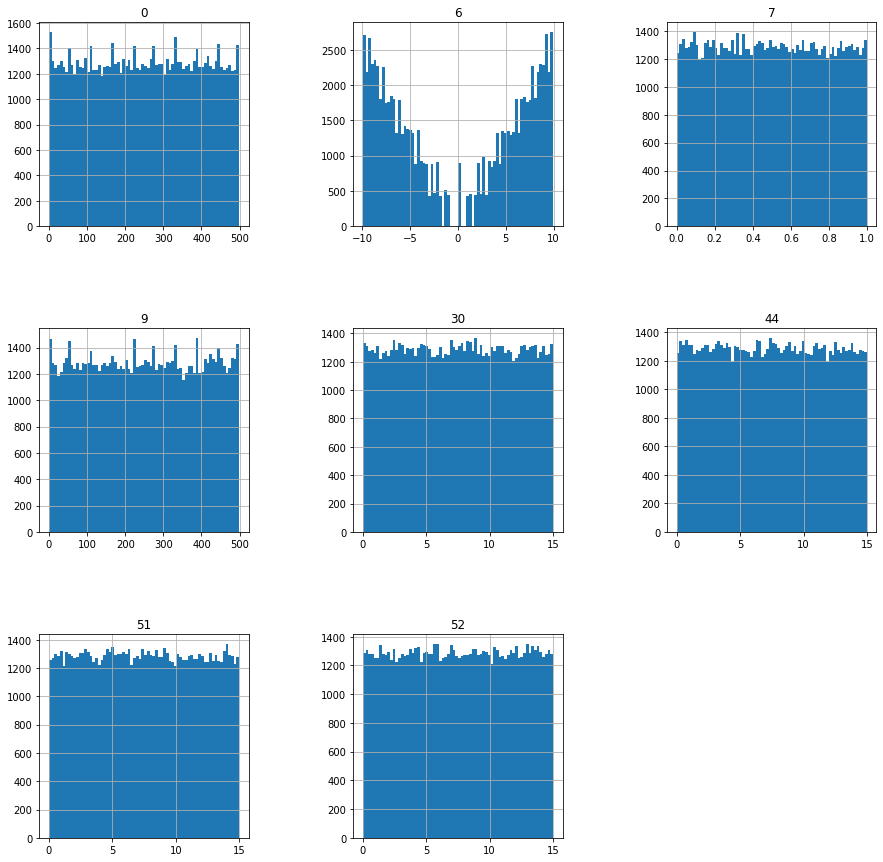

In [24]:
#distribution of some features
header = ['0','6','7','9','30','44','51','52']
df.hist(column=header,figsize=(15,15), bins=70)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

As we see from the results of describe() function and visualization of distribution, most of our features has uniform distribution.

In [25]:
corr_matrix = df.corr(method='spearman')

print("Spearman's rank correlation coefficient matrix: \n", corr_matrix)

Spearman's rank correlation coefficient matrix: 
                0         1         2         3         4         5         6  \
0       1.000000  0.002003  0.001150  0.002951 -0.003730 -0.007375  0.007609   
1       0.002003  1.000000 -0.001835 -0.004664 -0.002428 -0.002024  0.004003   
2       0.001150 -0.001835  1.000000 -0.000792  0.003070 -0.002166  0.002254   
3       0.002951 -0.004664 -0.000792  1.000000 -0.003619 -0.001043 -0.000039   
4      -0.003730 -0.002428  0.003070 -0.003619  1.000000 -0.000989  0.005505   
5      -0.007375 -0.002024 -0.002166 -0.001043 -0.000989  1.000000 -0.004398   
6       0.007609  0.004003  0.002254 -0.000039  0.005505 -0.004398  1.000000   
7       0.007179  0.005779 -0.000296 -0.004285 -0.004482 -0.001442 -0.003394   
8       0.008019  0.004094  0.001992  0.000956  0.004762 -0.002292  0.865948   
9       0.002343  0.002610  0.005746  0.000208 -0.000778  0.004727 -0.006822   
10      0.000083 -0.002699 -0.002215 -0.004977 -0.000396 -0.003562  0.

As we see Spearman's rank correlation coefficient is close to zero, indicating a weak or no correlation between the two variables. Uniform distribution  means that the values are evenly distributed across the range of possible values. So it is not a meaningful measure of the relationship between the variables in our case.



In [26]:
# LinearRegression
from sklearn.linear_model import LinearRegression


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate model using RMSE metric
y_pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)


RMSE: 29.015412891101406


In [81]:
# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Train random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model using RMSE metric
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)



RMSE: 0.0038139644666018075


The difference in RMSE values between a linear regression model and a Random Forest Regressor model can be attributed to the ability of
Random Forest Regressors to capture non-linear relationships, interactions between features. 
Linear regression models also assume that the predictor variables are independent of each other.

In [36]:
# Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Train gradient boosting regression model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate model using RMSE metric
y_pred = gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 0.4167589861416168


In [68]:
# Neural network model

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Separate the features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


Epoch 1/50
1800/1800 [==============================] - 78s 43ms/step - loss: 915.9277 - val_loss: 861.9809
Epoch 2/50
1800/1800 [==============================] - 4s 2ms/step - loss: 869.7028 - val_loss: 931.5364
Epoch 3/50
1800/1800 [==============================] - 4s 2ms/step - loss: 852.4731 - val_loss: 785.1376
Epoch 4/50
1800/1800 [==============================] - 4s 2ms/step - loss: 161.5682 - val_loss: 22.8443
Epoch 5/50
1800/1800 [==============================] - 4s 2ms/step - loss: 23.4166 - val_loss: 20.8694
Epoch 6/50
1800/1800 [==============================] - 4s 2ms/step - loss: 21.7586 - val_loss: 19.3878
Epoch 7/50
1800/1800 [==============================] - 4s 2ms/step - loss: 19.8148 - val_loss: 14.4938
Epoch 8/50
1800/1800 [==============================] - 4s 2ms/step - loss: 17.8860 - val_loss: 19.0250
Epoch 9/50
1800/1800 [==============================] - 4s 2ms/step - loss: 16.9244 - val_loss: 13.2799
Epoch 10/50
1800/1800 [==============================] 

In [76]:
# Make predictions on the test data using Gradient Boosting Regressor model
y_pred_test = gbr.predict(df_test)


In [77]:
df_test['predicted'] = y_pred_test
df_test['predicted'].describe()

count    10000.000000
mean        49.961329
std         28.808705
min          1.216040
25%         24.892255
50%         50.113338
75%         74.744535
max         99.725507
Name: predicted, dtype: float64

In [78]:
df_test.to_csv('test_results.csv', index=False)

In [89]:
!pip install pipreqs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
!pipreqs . --force

INFO: Successfully saved requirements file in ./requirements.txt
